In [7]:
import numpy as np
from numpy.polynomial import Polynomial
from scipy import constants

import matplotlib.pyplot as plt

In [59]:
def gen_legendre(n):
    inner = Polynomial([-1,0,1])
    coef = ((2**n) * np.math.factorial(n)) 
    poly = inner**n
    return (coef**-1) * poly.deriv(n) #rodriguez formula

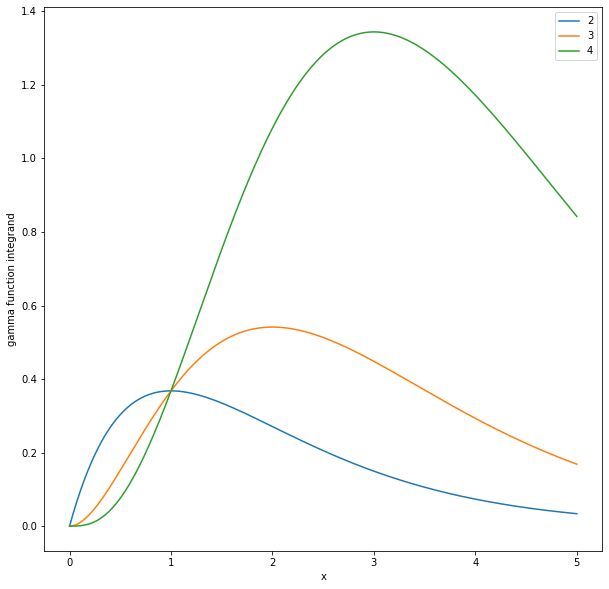

In [23]:
#PART A

x = np.linspace(0,5,1000)
a_s = [2,3,4]

plt.figure(figsize=(10,10))
for a in a_s:
    plt.plot(x,x**(a-1)*np.exp(-x), label=a)
    plt.xlabel('x')
    plt.ylabel('gamma function integrand')
plt.legend()

In [16]:
#PART B
#use latex derivative set equal to 0

For a = 2
z for maximum integrand: [0.50011671]
x for maximum integrand: [2.00093386]
For a = 3
z for maximum integrand: [0.50011671]
x for maximum integrand: [3.00140079]
For a = 4
z for maximum integrand: [0.50011671]
x for maximum integrand: [4.00186773]


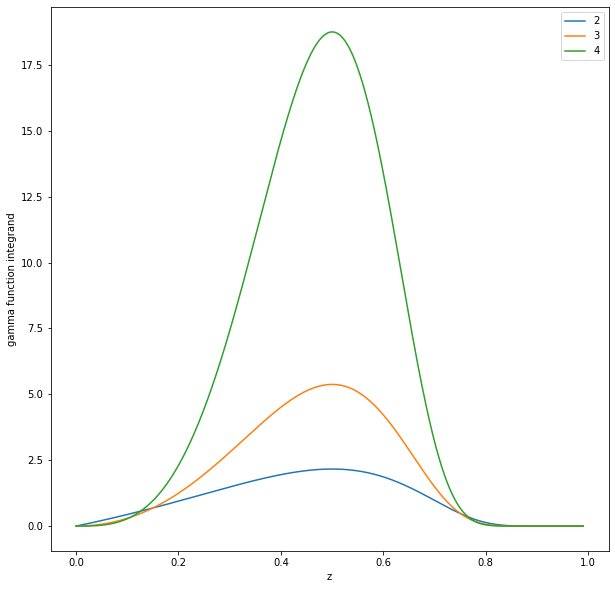

In [48]:
#PART C
#changing limits of integration from 0 to 1

x = np.linspace(0,0.99,3000)
a_s = [2,3,4]

plt.figure(figsize=(10,10))
#c=2
for a in a_s:
    c=a #z = 1/2 occurs at c=a , justification below 
    y = c**-1 * (c+x*c/(1-x))**2 * (x*c/(1-x))**(a-1)*np.exp(-x*c/(1-x))
    
    #print(np.max(y))
    #this gives you the value for z for where there is a maximum
    #in the ingtegrand
    max_index = np.where(y==np.max(y))
    print(f"For a = {a}")
    print(f"z for maximum integrand: {x[max_index]}") #about 1/2 so it seems right!
    print(f"x for maximum integrand: {x[max_index]*c/(1-x[max_index])}")
    
    
    plt.plot(x,y, label=a)
    plt.xlabel('z')
    plt.ylabel('gamma function integrand')
plt.legend()


For a = 2
z for maximum integrand: [0.50002401]
x for maximum integrand: [2.00019207]
For a = 3
z for maximum integrand: [0.50002401]
x for maximum integrand: [3.00028811]
For a = 4
z for maximum integrand: [0.50002401]
x for maximum integrand: [4.00038415]


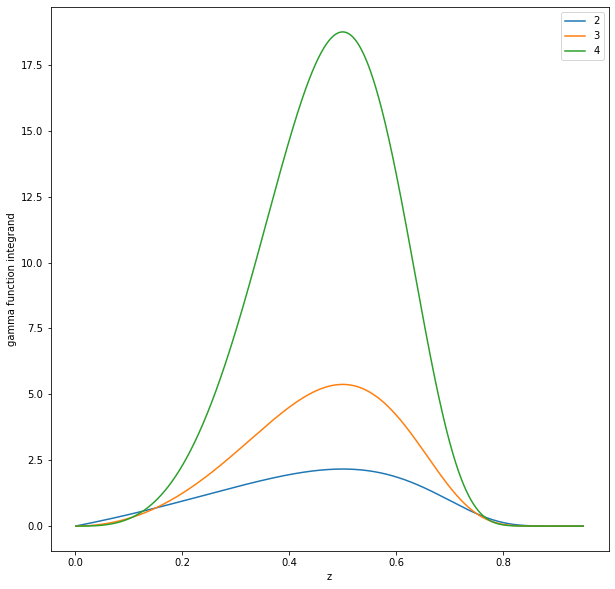

In [58]:
#PART D
#latex write it out
#dont do the integral z past like 0.8
#
x = np.linspace(0.001,0.95,3000)
a_s = [2,3,4]

plt.figure(figsize=(10,10))
for a in a_s:
    y_new =  a* np.exp((a-1)*np.log(x*a/(1-x))-x*a/(1-x)) * 1/(1-x)**2
    
    max_index = np.where(y_new==np.max(y_new))
    print(f"For a = {a}")
    print(f"z for maximum integrand: {x[max_index]}")
    print(f"x for maximum integrand: {x[max_index]*a/(1-x[max_index])}")
    
    
    plt.plot(x,y_new, label=a)
    plt.xlabel('z')
    plt.ylabel('gamma function integrand')
plt.legend()

#ADD EXPLANATION FOR WHY YOU DO THIS


In [66]:
#PART E

def gamma(a):
    
    def gaussian_0_to_1(n,a):
        def func(x): #change function here
            integrand = a* np.exp((a-1)*np.log(x*a/(1-x))-x*a/(1-x)) * 1/(1-x)**2
            return integrand

        P_n = gen_legendre(n) #generate legendre polynomial
        P_roots = P_n.roots() #roots of legendre polynomial
        
        dxdP = P_n.deriv()  #derivative of legendre polynomial
        weights = 2 / (1 - P_roots**2) * (1/dxdP(P_roots))**2 #calc weights

        new_weights = weights/2 #for new range 0 to 1 not -1 to 1
        new_roots = 0.5 * P_roots + 0.5
        return np.sum(new_weights*func(new_roots)) #integral on the new range
    
    return gaussian_0_to_1(30,a)
    

print(gamma(1.5))

0.8862335893077319


In [65]:
#PART F

print(gamma(3))
print(gamma(6))
print(gamma(10))
print('')
print(np.math.factorial(3-1))
print(np.math.factorial(6-1))
print(np.math.factorial(10-1))

2.000000191692186
120.00000841496323
362880.4747789453

2
120
362880
